In [1]:
import matplotlib.pyplot as plt, pandas as pd , numpy as np

In [2]:
df = pd.read_csv('../data/train.csv')

In [18]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [288]:
df['rAge']=pd.cut(df['Age'],[0,6,20,80],labels = ['0-6','6-20','20-80'])
df['rFare'] = pd.cut(df['Fare'],[0,5,20,512], labels =np.array(['0-5','5-20','20-515']))

In [16]:
df['Age'].value_counts(bins=[0.0,6.2,20,40,80])

(20.0, 40.0]     385
(40.0, 80.0]     150
(6.2, 20.0]      132
(-0.001, 6.2]     47
Name: Age, dtype: int64

In [33]:
df.groupby(pd.cut(df["Age"], [0,6,20,40,80])).count()
#df.groupby(pd.cut(df["Fare"], [0,6,20,40,80])).sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,,
"(0, 6]",47,47,47,47,47,47,47,47,47,47,10,47
"(6, 20]",132,132,132,132,132,132,132,132,132,132,19,132
"(20, 40]",385,385,385,385,385,385,385,385,385,385,90,384
"(40, 80]",150,150,150,150,150,150,150,150,150,150,66,149


In [270]:
df.columns.values
#cols = ['Survived','Pclass','rAge','SibSp','Parch','Cabin','Embarked']
cols = ['Survived','Pclass','Embarked']

In [271]:
g = df.groupby(cols)
g.size().unstack()

Embarked          C   Q    S
Survived Pclass             
0        1       26   1   53
         2        8   1   88
         3       41  45  286
1        1       59   1   74
         2        9   2   76
         3       25  27   67

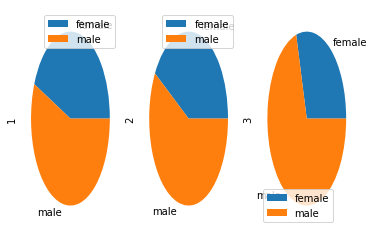

In [290]:
gg.size().unstack().plot(kind= 'pie',subplots = True)
plt.show()

In [120]:
new_gg = df.groupby(['rAge','Sex'])
new_gg.size()

rAge   Sex   
0-6    female     23
       male       24
6-20   female     54
       male       78
20-80  female    184
       male      351
dtype: int64

In [121]:
new_gg.size().unstack()

Sex,female,male
rAge,,
0-6,23,24
6-20,54,78
20-80,184,351


In [189]:
new_gg.size().unstack().iloc[0]

Sex
female    23
male      24
Name: 0-6, dtype: int64

In [201]:
new_gg.size().unstack().iloc[1][1]

78

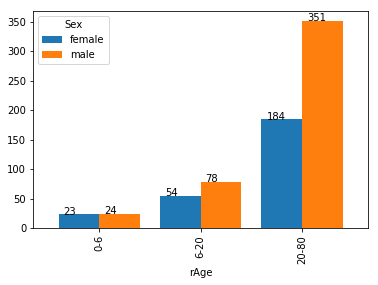

In [228]:
new_gg.size().unstack().plot(kind = 'bar',width=0.8)
#for age,tot in zip(ages,totals.values.flatten()):
#plt.annotate(xy=(-0.35,23),s='23',fontweight = 'bold')
#plt.annotate(xy=(-0.35+0.4,24),s='24',fontweight = 'bold')
#plt.annotate(xy=(-0.35+1,50),s='hello',color= 'r',fontweight = True)
for k in range(len(new_gg.size().unstack().index)):
    for i in range(len(new_gg.size().unstack().columns)):
        plt.annotate(xy=(-0.35+k+i*0.4,new_gg.size().unstack().iloc[k][i]), s=new_gg.size().unstack().iloc[k][i] )

plt.show()

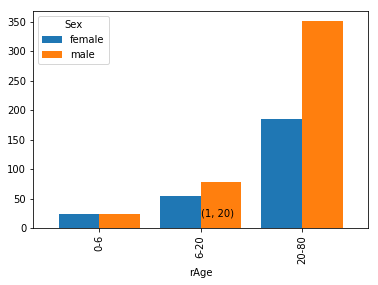

In [175]:
new_gg.size().unstack().plot(kind = 'bar',width=0.8)
#for age,tot in zip(ages,totals.values.flatten()):
#plt.annotate(xy=(-0.35,50),s='hello',fontweight = 'bold')
plt.annotate('(%s, %s)' % (1,20), xy=(1,20), textcoords='data')
plt.show()

In [ ]:
for age,tot in zip(ages,totals.values.flatten()):
    plt.annotate('N={:d}'.format(tot), xy=(age+0.4, tot), xytext=(0,5), textcoords='offset points', ha='center', va='bottom')

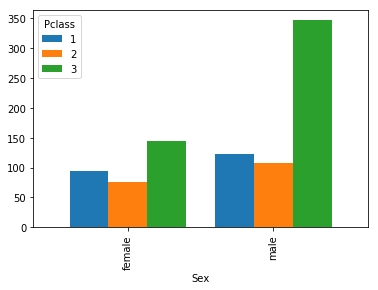

In [226]:
gg.size().unstack().plot(kind= 'bar',width=0.8)
plt.show()

In [219]:
gg = df.groupby(['Sex','Pclass'])

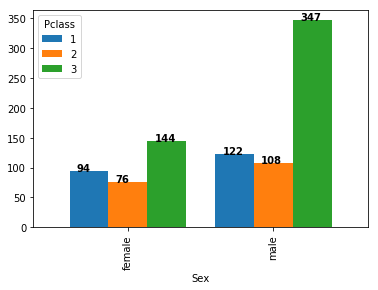

In [249]:
wid = 0.8
gg.size().unstack().plot(kind = 'bar',width=wid)
#for age,tot in zip(ages,totals.values.flatten()):
#plt.annotate(xy=(-0.35,23),s='23',fontweight = 'bold')
#plt.annotate(xy=(-0.35+0.4,24),s='24',fontweight = 'bold')
#plt.annotate(xy=(-0.35+1,50),s='hello',color= 'r',fontweight = True)
for k in range(len(gg.size().unstack().index)):
    for i in range(len(gg.size().unstack().columns)):
        plt.annotate(xy=(-0.35+k+i*wid/3,gg.size().unstack().iloc[k,i]), s=gg.size().unstack().iloc[k,i],fontweight = 'bold' )

plt.show()

In [286]:
def bar_var2(var1, var2):
    gg = df.groupby([var1,var2])
    wid = 0.8
    gg.size().unstack().plot(kind = 'bar',width=wid)
    for k in range(len(gg.size().unstack().index)):
        for i in range(len(gg.size().unstack().columns)):
            plt.annotate(xy=(-0.35+k+i*wid/len(gg.size().unstack().columns),gg.size().unstack().iloc[k,i]), 
                         s=gg.size().unstack().iloc[k,i],fontweight = 'bold' )

    plt.show()

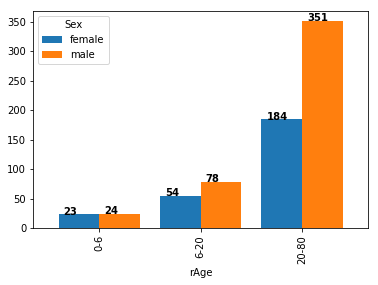

In [287]:
bar_var2('rAge','Sex')

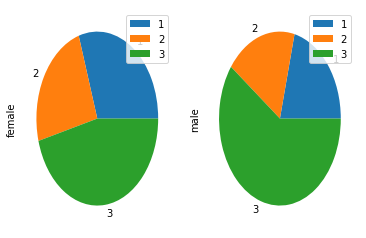

In [111]:
gg.size().unstack().plot(kind= 'pie',subplots = True,layout= (1,2))
plt.show()

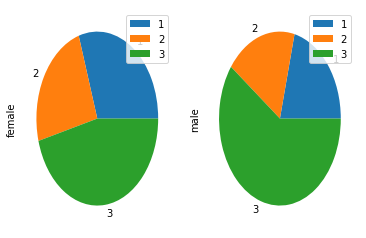

In [109]:
gg.size().unstack().plot(kind= 'pie',subplots = True,layout= (1,2))
plt.show()

In [81]:
#gg.size()['male']
gg.size()[1]

76

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [44]:
def func(x):
    if x=='male':
        return 0
    else:
        return 1

In [45]:
df['sex_n'] = df['Sex'].apply(func)